# Исследование "Аренда самокатов"

## Описание проекта
Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти. <br>
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
- без подписки <br>
    - абонентская плата отсутствует;
    - стоимость одной минуты поездки — 8 рублей;
    - стоимость старта (начала поездки) — 50 рублей;
- с подпиской Ultra
    - абонентская плата — 199 рублей в месяц;
    - стоимость одной минуты поездки — 6 рублей;
    - стоимость старта — бесплатно.

## Описание данных
В основных данных есть информация о пользователях, их поездках и подписках. Пользователи — **users_go.csv** <br>
**user_id** – уникальный идентификатор пользователя <br>
**name** – имя пользователя <br>
**age** – возраст <br> 
**city** – город <br>
**subscription_type** – тип подписки (free, ultra) <br>
<br>
Поездки — **rides_go.csv**<br>
**user_id** — уникальный идентификатор пользователя<br>
**distance** — расстояние, которое пользователь проехал в текущей сессии (в метрах)<br>
**duration** — продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»<br>
**date** — дата совершения поездки
<br> <br>
Подписки — **subscriptions_go.csv**<br>
**subscription_type** — тип подписки<br>
**minute_price** — стоимость одной минуты поездки по данной подписке<br>
**start_ride_price** — стоимость начала поездки<br>
**subscription_fee** — стоимость ежемесячного платежа<br>

In [1]:
import pandas as pd #импорт библиотек
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from scipy.stats import binom

### Откроем файлы в разных вариациях (на всякий случай)

In [2]:
#путь к файлу
local_path = 'users_go.csv' #локальный путь
default_path = '/datasets/users_go.csv' #для проверки

#попытка прочитать файл
try:
    user_data = pd.read_csv(default_path)
    print('Файл успешно загружен с локального пути')
except FileNotFoundError:
    try:
        user_data = pd.read_csv(local_path)
        print('Файл успешно загружен с пути для проверок')
    except FileNotFoundError:
        print('Файл не найден ни по одному из путей')
pd.set_option('display.max_columns', None)
user_data.head()

Файл успешно загружен с локального пути


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [3]:
#путь к файлу
local_path = 'rides_go.csv' #локальный путь
default_path = '/datasets/rides_go.csv' #для проверки

#попытка прочитать файл
try:
    rides_data = pd.read_csv(default_path)
    print('Файл успешно загружен с локального пути')
except FileNotFoundError:
    try:
        rides_data = pd.read_csv(local_path)
        print('Файл успешно загружен с пути для проверок')
    except FileNotFoundError:
        print('Файл не найден ни по одному из путей')
rides_data.head()

Файл успешно загружен с локального пути


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [4]:
#путь к файлу
local_path = 'subscriptions_go.csv' #локальный путь
default_path = '/datasets/subscriptions_go.csv' #для проверки

#попытка прочитать файл
try:
    subscriptions_data = pd.read_csv(default_path)
    print('Файл успешно загружен с локального пути')
except FileNotFoundError:
    try:
        subscriptions_data = pd.read_csv(local_path)
        print('Файл успешно загружен с пути для проверок')
    except FileNotFoundError:
        print('Файл не найден ни по одному из путей')
subscriptions_data.head()

Файл успешно загружен с локального пути


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


### Изучим общую информацию о каждом датафрейме

In [5]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


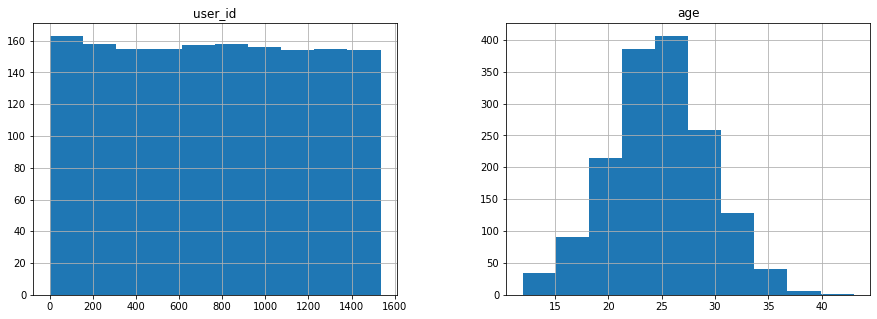

In [6]:
user_data.hist(figsize=(15, 5)); #построим гистограмму для всех стоблцов датафрейма

In [7]:
rides_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


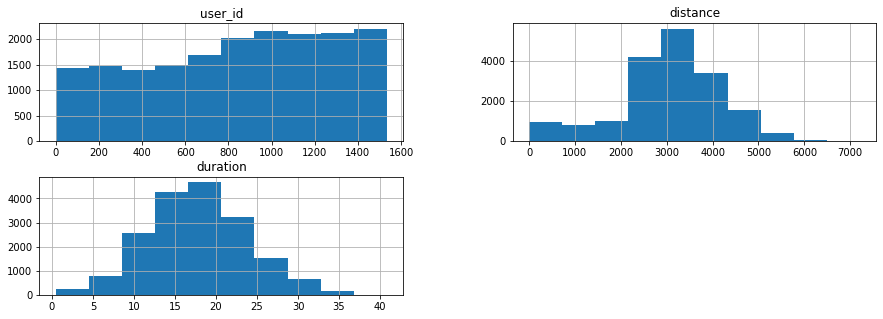

In [8]:
rides_data.hist(figsize=(15, 5));

In [9]:
subscriptions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


In [10]:
user_data.duplicated().sum() #посчёт дубликатов в датасете

31

In [11]:
rides_data.duplicated().sum() #посчёт дубликатов в датасете

0

In [12]:
subscriptions_data.duplicated().sum() #посчёт дубликатов в датасете

0

#### Вывод по первому знакомству с датафреймами 
В датафрейме **user_data** представлена иформация о пользователях. Датафрейм представлен 1565 строками, индексы от 0 до 1564, пропущенных значений нет, 5 столбцов, явных дубликатов 31, данные визуализированы  <br> 
В датафрейме **rides_data** представлена иформация о поездках пользователей. Датафрейм представлен 18068 строками, индексы от 0 до 18067, пропущенных значений нет, 4 столбца, явных дубликатов нет, данные визуализированы <br>
В датафрейме **subscriptions_data** представлена иформация о подписках пользователей. Датафрейм представлен 2 строками, индексы от 0 до 1, пропущенных значений нет, 4 столбца, явных дубликатов нет

###  Предобработка данных

In [13]:
rides_data.head(1)

,user_id,distance,duration,date
0,1,4409.91914,25.599769,2021-01-01


In [14]:
rides_data['date'] = pd.to_datetime(rides_data['date'], format='%Y-%m-%d') #перевод в тип данных дататайм
rides_data['date'].dtype #проверка типа

dtype('<M8[ns]')

In [15]:
rides_data['month'] = rides_data['date'].dt.month #создание столбца с номером месяца
rides_data.head(1) #вывод первой строки датафрейма

,user_id,distance,duration,date,month
0,1,4409.91914,25.599769,2021-01-01,1


In [16]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [17]:
user_data.drop_duplicates(keep='first').reset_index(drop=True).head() #удаление явных дубликатов

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [18]:
display(set(user_data['name'].unique()))
uniq_count = user_data['name'].nunique()
print(f'Число уникальных значений столбца: {uniq_count}')

{'Агата',
 'Аделина',
 'Адель',
 'Айдар',
 'Александр',
 'Александра',
 'Алексей',
 'Алина',
 'Алиса',
 'Алия',
 'Алла',
 'Альберт',
 'Альбина',
 'Алёна',
 'Амалия',
 'Амина',
 'Амир',
 'Анастасия',
 'Анатолий',
 'Ангелина',
 'Андрей',
 'Анжелика',
 'Анна',
 'Антон',
 'Антонина',
 'Ариана',
 'Арина',
 'Арсен',
 'Арсений',
 'Артемий',
 'Артур',
 'Артём',
 'Богдан',
 'Борис',
 'Вадим',
 'Валентина',
 'Валерий',
 'Валерия',
 'Варвара',
 'Василий',
 'Василина',
 'Василиса',
 'Вера',
 'Вероника',
 'Виктор',
 'Виктория',
 'Виолетта',
 'Виталий',
 'Виталина',
 'Влад',
 'Влада',
 'Владимир',
 'Владислав',
 'Владислава',
 'Всеволод',
 'Вячеслав',
 'Галина',
 'Георгий',
 'Герман',
 'Глеб',
 'Гордей',
 'Григорий',
 'Давид',
 'Дамир',
 'Даниил',
 'Данил',
 'Данила',
 'Даниэль',
 'Дарина',
 'Дарья',
 'Демид',
 'Денис',
 'Диана',
 'Дмитрий',
 'Ева',
 'Евгений',
 'Евгения',
 'Егор',
 'Екатерина',
 'Елена',
 'Елизавета',
 'Елисей',
 'Есения',
 'Жанна',
 'Зарина',
 'Захар',
 'Злата',
 'Иван',
 'Игнат',

Число уникальных значений столбца: 194


*Неявных дубликатов замечено не было*

In [19]:
display(set(user_data['city'].unique()))
uniq_count_city = user_data['city'].nunique()
print(f'Число уникальных значений столбца: {uniq_count_city}')

{'Екатеринбург',
 'Краснодар',
 'Москва',
 'Омск',
 'Пятигорск',
 'Ростов-на-Дону',
 'Сочи',
 'Тюмень'}

Число уникальных значений столбца: 8


*Неявных дубликатов замечено не было*

In [20]:
rides_data['distance'] = rides_data['distance'].round(2) #для удобства округлим значения до двух знаков после точки
rides_data['duration'] = rides_data['duration'].round(2)

#### Вывод по Предобработке данных
Была проведена Предобработка данных в трёх датафреймах. В **user_data** приведён столбец **"date"** к типу datetime и создан отдельный столбец для номера месяца. Также были удалены явные дубликаты, произведен поиск неявных дубликатов (таких не нашлось). В датафрейме **rides_data** округлены значения столбцов **distance**, **duration** до двух знаков после точки. Датафрейм **subscriptions_data** обладает небольшим объёмом информации, в предобработке не нуждается

### Исследовательский анализ данных
Опишем и визуализируем общую информацию о пользователях и поездках

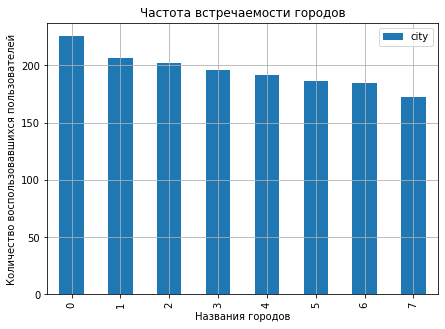

In [21]:
user_data['city'].value_counts().reset_index().plot(
    kind='bar',
    figsize=(7,5),
    xlabel='Названия городов',
    ylabel='Количество воспользовавшихся пользователей',
    title='Частота встречаемости городов',
    grid=True)
plt.show()

In [22]:
user_data['city'].value_counts().reset_index()

,index,city
0,Пятигорск,226
1,Екатеринбург,206
2,Ростов-на-Дону,202
3,Краснодар,196
4,Сочи,192
5,Омск,186
6,Тюмень,185
7,Москва,172


*На столбчатой диаграмме **"Частота встречаемости городов"** заметно, что чаще всего люди пользуются самокатами в г. Пятигорск, а Москва занимает последнее место. Возможно, это связано с тем, что в Москве сильный поток транспорта, что не позволяет в полной мере ездить на самокатах. Также можно заметить, что в основном лидирующие позиции занимают южные города, где сезон проката самокатов несколько дольше, чем в других*

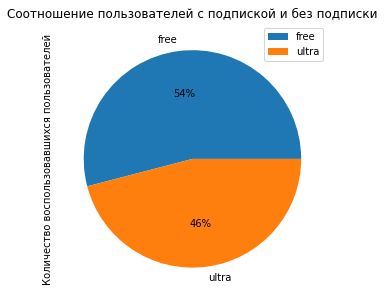

In [23]:
user_data['subscription_type'].value_counts().plot(
    kind='pie',
    figsize=(7,5), 
    y='count',
    autopct='%1.0f%%',
    legend=True,
    ylabel='Количество воспользовавшихся пользователей',
    title='Cоотношение пользователей с подпиской и без подписки')
plt.show() 

In [24]:
user_data['subscription_type'].value_counts().reset_index()

,index,subscription_type
0,free,846
1,ultra,719


*На круговой диаграмме **"Cоотношение пользователей с подпиской и без подписки"** заметно, что 54% пользователей пользуются прокатом самокатов без подписки (free - бесплатно), а подпиской пользуются – 46% – это не половина от всего датасета, но близкое к нему значение*

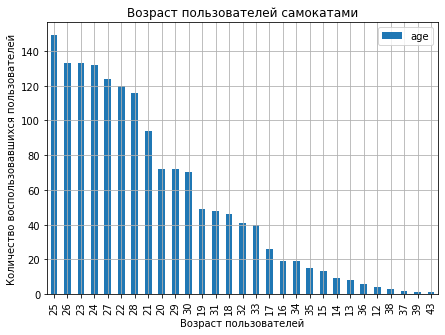

In [25]:
user_data['age'].value_counts().plot(
    kind='bar',
    figsize=(7,5),
    xlabel='Возраст пользователей',
    ylabel='Количество воспользовавшихся пользователей',
    title='Возраст пользователей самокатами',
    legend=True,
    grid=True)
plt.show()

In [26]:
user_data['age'].value_counts().reset_index().head()

,index,age
0,25,149
1,26,133
2,23,133
3,24,132
4,27,124


*На столбчатой диаграмме **"Возраст пользователей самокатами"** заметно, что чаще всего самокатами пользуются люди в возрасте 25 лет. Можно выявить, что возрастная категория 22-28 лет чаще всех арендуют самокат, что на практике действительно верно*

In [27]:
rides_data['distance'].describe()

count    18068.000000
mean      3070.659992
std       1116.831222
min          0.860000
25%       2543.227500
50%       3133.610000
75%       3776.220000
max       7211.010000
Name: distance, dtype: float64

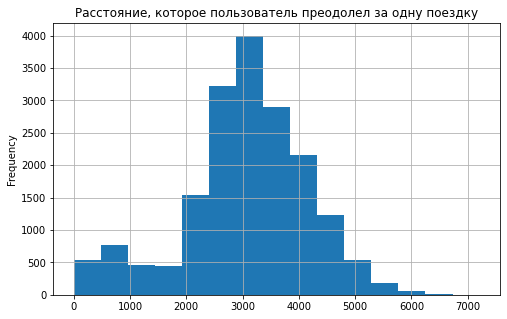

In [28]:
rides_data['distance'].plot(
    kind='hist',
    bins=15,
    figsize=(8,5),
    xlabel='Расстояние в метрах',
    ylabel='Количество воспользовавшихся пользователей',
    title='Расстояние, которое пользователь преодолел за одну поездку',
    grid=True)
plt.show()

*На гистограмме **"Расстояние, которое пользователь преодолел за одну поездку"** видно, что чаще всего пользователи преодолевают расстрояние в примерно 3 км, однако по рисунку виден относительно небольшой всплеск спроса на короткую дистанцию до 1 км*

In [29]:
rides_data['duration'].describe()

count    18068.000000
mean        17.805017
std          6.091071
min          0.500000
25%         13.600000
50%         17.680000
75%         21.722500
max         40.820000
Name: duration, dtype: float64

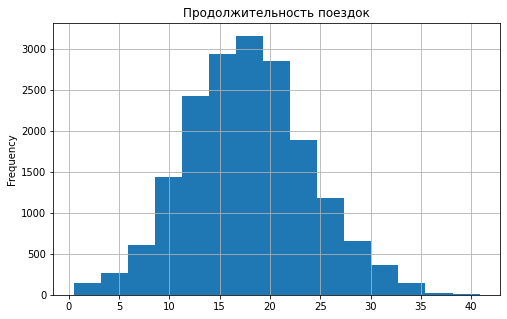

In [30]:
rides_data['duration'].plot(
    kind='hist',
    bins=15,
    figsize=(8,5),
    xlabel='Продолжительность поездки в минутах',
    ylabel='Количество воспользовавшихся пользователей',
    title='Продолжительность поездок',
    grid=True)
plt.show()

*На гистограмме **"Продолжительность поездок"** видно, что чаще всего сессия поездки составляет примерно 17-18 минут*

#### Выводы по Исследовательскому анализу даннных
Был проведен Исследовательский анализ данных, который показал общую картину пользователя аренды самокатов. Более подробная информация представлена ниже:
- *На столбчатой диаграмме **"Частота встречаемости городов"** заметно, что чаще всего люди пользуются самокатами в г. Пятигорск, а Москва занимает последнее место. Возможно, это связано с тем, что в Москве сильный поток транспорта, что не позволяет в полной мере ездить на самокатах. Также можно заметить, что в основном лидирующие позиции занимают южные города, где сезон проката самокатов несколько дольше, чем в других*
- *На круговой диаграмме **"Cоотношение пользователей с подпиской и без подписки"** заметно, что 54% пользователей пользуются прокатом самокатов без подписки (free - бесплатно), а подпиской пользуются – 46% – это не половина от всего датасета, но близкое к нему значение*
- *На столбчатой диаграмме **"Возраст пользователей самокатами"** заметно, что чаще всего самокатами пользуются люди в возрасте 25 лет. Можно выявить, что возрастная категория 22-28 лет чаще всех арендуют самокат, что на практике действительно верно*
- *На гистограмме **"Расстояние, которое пользователь преодолел за одну поездку"** видно, что чаще всего пользователи преодолевают расстрояние в примерно 3 км, однако по рисунку виден относительно небольшой всплеск спроса на короткую дистанцию до 1 км*
- *На гистограмме **"Продолжительность поездок"** видно, что чаще всего сессия поездки составляет примерно 17-18 минут*
<br> <br> 
Портрет среднестатистического пользователя сервисом аренды самокатов следующий: человек из Пятигорска, с бесплатной подпиской, возраста 25 лет, который проехал 3 км за 17-18 минут. Скорее всего, такое большое время связано с тем, что люди катаются не для конкретного перемещения из одной точки в другую, а в целях прогулки на "электрической машине"

### Объединение данных

In [31]:
user_rides_data = pd.merge(user_data, rides_data, on='user_id') #объединение данных пользователей и поездок
full_data = pd.merge(user_rides_data, subscriptions_data, on='subscription_type') #объединение полученного датафрейма с данными о подписках
display(full_data.isna().sum()) #проверка пропущенных значений после объединения столбцов
full_data.head()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,25.60,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,15.82,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,6.23,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,18.51,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,26.27,2021-08-28,8,6,0,199


In [32]:
data_free = full_data[full_data['subscription_type'] == 'free'] #срез только тех пользователей, у кого нет подписки
data_ultra = full_data[full_data['subscription_type'] == 'ultra'] #срез только тех пользователей, у кого есть подписка
print('Датафрейм c данными о пользователях без подписки:')
display(data_free.head())
print('Датафрейм с данными о пользователях с подпиской:')
data_ultra.head()

Датафрейм c данными о пользователях без подписки:


,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6672,700,Айдар,22,Омск,free,2515.69,14.94,2021-01-02,1,8,50,0
6673,700,Айдар,22,Омск,free,846.93,16.23,2021-02-01,2,8,50,0
6674,700,Айдар,22,Омск,free,4004.43,20.02,2021-02-04,2,8,50,0
6675,700,Айдар,22,Омск,free,1205.91,9.78,2021-02-10,2,8,50,0
6676,700,Айдар,22,Омск,free,3047.38,17.43,2021-02-14,2,8,50,0


Датафрейм с данными о пользователях с подпиской:


,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,25.60,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,15.82,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,6.23,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,18.51,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,26.27,2021-08-28,8,6,0,199


*Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий*

In [33]:
data_free['distance'].describe() #вывод описательной статистики

count    11716.000000
mean      3045.357338
std       1246.269591
min          0.860000
25%       2366.995000
50%       3114.665000
75%       3903.765000
max       7211.010000
Name: distance, dtype: float64

In [34]:
data_ultra['distance'].describe() #вывод описательной статистики

count    6672.000000
mean     3115.435009
std       836.687033
min       244.210000
25%      2785.360000
50%      3148.735000
75%      3559.722500
max      5699.770000
Name: distance, dtype: float64

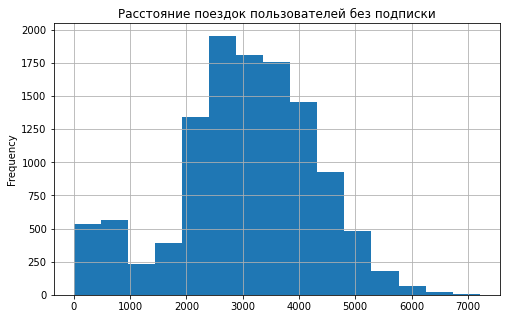

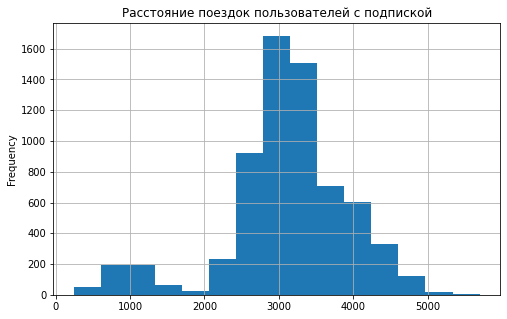

In [35]:
#для бесплатного тарифа
data_free['distance'].plot(
    kind='hist',
    bins=15,
    figsize=(8,5),
    xlabel='Расстояние в метрах',
    ylabel='Частота',
    title='Расстояние поездок пользователей без подписки',
    grid=True)
plt.show()

#для платной подписки
data_ultra['distance'].plot(
    kind='hist',
    bins=15,
    figsize=(8,5),
    xlabel='Расстояние в метрах',
    ylabel='Частота',
    title='Расстояние поездок пользователей с подпиской',
    grid=True)
plt.show()

In [36]:
data_free['duration'].describe() #вывод описательной статистики

count    11716.000000
mean        17.394821
std          6.326347
min          0.500000
25%         12.960000
50%         17.340000
75%         21.602500
max         34.950000
Name: duration, dtype: float64

In [37]:
data_ultra['duration'].describe() #вывод описательной статистики

count    6672.000000
mean       18.531451
std         5.572656
min         3.760000
25%        14.500000
50%        18.180000
75%        21.890000
max        40.820000
Name: duration, dtype: float64

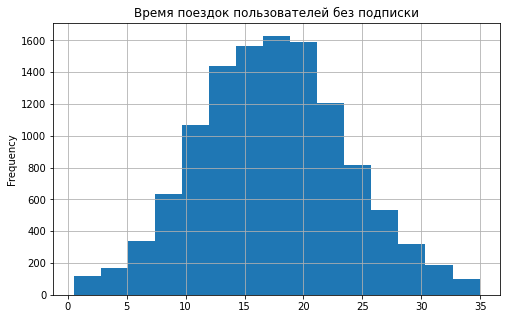

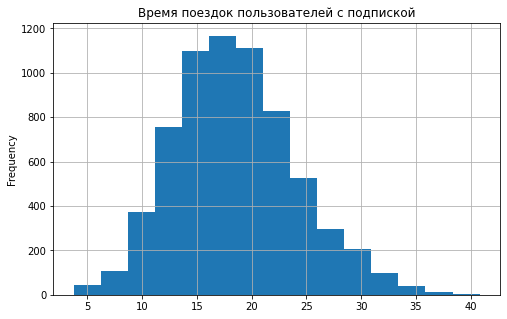

In [38]:
#для бесплатного тарифа
data_free['duration'].plot(
    kind='hist',
    bins=15,
    figsize=(8,5),
    xlabel='Время в минутах',
    ylabel='Частота',
    title='Время поездок пользователей без подписки',
    grid=True)
plt.show()

#для платной подписки
data_ultra['duration'].plot(
    kind='hist',
    bins=15,
    figsize=(8,5),
    xlabel='Время в минутах',
    ylabel='Частота',
    title='Время поездок пользователей с подпиской',
    grid=True)
plt.show()

#### Вывод по объединению и визуализации данных
На данном шаге были объединены три датафрейма в один с сохранением всех данных, после чего в два отдельных датасета выделены пользователи, имеющие и не имеющие подписку. Также была приведена описательная статистика времени и дистанции поездки для каждой группы пользователей, визуализированы данные <br> Рассматривая гистограммы, связанные с расстояниями поездок, можно заметить, что медианное значение для людей с подпиской возрастает, а стандартное отклонение уменьшается – возможно, это связано с тем, что кататься на самокате в долгую перспективу выгоднее, чем на короткие дистанции. Также важно заметить, что самокаты были арендованы также на короткие дистанции, что создало ещё один небольшой пик
<br> Рассматривая гистограммы, связанные со временем поездок, можно заметить, что медианное значение для людей с подпиской возрастает, как и максимальное время аренды, а стандартное отклонение так же уменьшается. Возможно, данная закономерность связана с тем, что с подпиской выгоднее ездить для пользователей

### Подсчёт выручки

In [39]:
full_data['duration'] = np.ceil(full_data['duration']) 

In [40]:
full_data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,27.0,2021-08-28,8,6,0,199


In [41]:
aggregated_data = full_data.groupby(['user_id', 'month']).agg({
    'distance': 'sum',
    'duration': 'sum',
    'date': 'count'
}).rename(columns={'date': 'ride_count'}).reset_index()
aggregated_data.head(10)

,user_id,month,distance,duration,ride_count
0,1,1,7027.51,42.0,2
1,1,4,754.16,7.0,1
2,1,8,6723.47,46.0,2
3,1,10,5809.91,32.0,2
4,1,11,7003.50,56.0,3
5,1,12,6751.63,28.0,2
6,2,3,10187.73,63.0,3
7,2,4,6164.39,40.0,2
8,2,6,3255.34,14.0,1
9,2,7,6780.73,48.0,2


In [42]:
#объединение с данными о подписках для получения условий оплаты
aggregated_data = pd.merge(aggregated_data, user_data[['user_id', 'subscription_type']], on='user_id') #объединение агрегированного датасета с типом данных
aggregated_data = pd.merge(aggregated_data, subscriptions_data, on='subscription_type') #объединение агрегированного датасета с ценами 
aggregated_data.head()

,user_id,month,distance,duration,ride_count,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,1,7027.51,42.0,2,ultra,6,0,199
1,1,4,754.16,7.0,1,ultra,6,0,199
2,1,8,6723.47,46.0,2,ultra,6,0,199
3,1,10,5809.91,32.0,2,ultra,6,0,199
4,1,11,7003.50,56.0,3,ultra,6,0,199


In [43]:
#подсчёт помесячной выручки
aggregated_data['revenue'] = (
    aggregated_data['start_ride_price'] * aggregated_data['ride_count'] +
    aggregated_data['minute_price'] * aggregated_data['duration'] +
    aggregated_data['subscription_fee'] ) #формула: (стоимость старта поездки ×  количество поездок) + 
display(aggregated_data.head())           # +(стоимость одной минуты поездки × общая продолжительность всех поездок в минутах) + стоимость подписки
revenue_sum = aggregated_data['revenue'].sum()
print(f'Общая сумма выручки равна: {revenue_sum} рублей')

,user_id,month,distance,duration,ride_count,subscription_type,minute_price,start_ride_price,subscription_fee,revenue
0,1,1,7027.51,42.0,2,ultra,6,0,199,451.0
1,1,4,754.16,7.0,1,ultra,6,0,199,241.0
2,1,8,6723.47,46.0,2,ultra,6,0,199,475.0
3,1,10,5809.91,32.0,2,ultra,6,0,199,391.0
4,1,11,7003.50,56.0,3,ultra,6,0,199,535.0


Общая сумма выручки равна: 4047086.0 рублей


In [44]:
aggregated_data.pivot_table(index=['user_id', 'month'], values='revenue', aggfunc='sum').head(10)

revenue
user_id month         
1       1        451.0
        4        241.0
        8        475.0
        10       391.0
        11       535.0
        12       367.0
2       3        577.0
        4        439.0
        6        283.0
        7        487.0

#### Выводы по подсчёту выручки
В процессе выполнения данной части Исследования были округлены значения всех продолжительностей поездок до "потолка" (следующего целого числа), создан датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными, найдено суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц в **aggregated_data**. Далее в данный датафрейм был добавлен столбец с помесячной выручкой, которую принёс каждый пользователь, где выручка была рассчитана по формуле: (стоимость старта поездки ×  количество поездок) + (стоимость одной минуты поездки × общая продолжительность всех поездок в минутах) + стоимость подписки. **Общая сумма выручки равна 4 047 086 рублей**. В конце данного шага представлена таблица с валовой выручкой за каждый месяц каждого пользователя

### Проверка гипотез
#### Гипотеза №1
H0: Средняя продолжительность поездок у пользователей с платной и бесплатной подпиской равна между собой <br>
H1: Средняя продолжительность поездок у пользователей с платной подпиской больше, чем у пользователей с бесплатной

In [45]:
alpha = .05
results_1 = st.ttest_ind(data_ultra['duration'], data_free['duration'], alternative='greater')
print('p-значение:', results_1.pvalue)

if results_1.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.616762454120566e-34
Отвергаем нулевую гипотезу


#### Вывод по Гипотезе №1
Отвержение нулевой гипотезы о равенстве средней продолжительности поездок у пользователей с платной и бесплатной подпиской даёт право полагать, что альтернативная правосторонняя гипотеза H1 верна, однако по графикам видно, что наоборот 

#### Гипотеза №2
H0: Среднее расстояние поездки с платной подпиской равно 3130 метров <br>
H1: Среднее расстояние поездки больше, чем 3130 метров

In [46]:
alpha = .05
sr_znach = 3130
results_2 = st.ttest_1samp(data_ultra['distance'], sr_znach, alternative='greater')
print('p-значение:', results_2.pvalue)

if results_2.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9224519050425992
Не получилось отвергнуть нулевую гипотезу


##### Вывод по Гипотезе №2
С высокой вероятностью не получилось опровергнуть нулевую гипотезу – это означает, что Гипотезу о том, что среднее расстояние поездки с платной подпиской равно 3130 метров отвергнуть нельзя, она имеет место быть

#### Гипотеза №3
H0: Средняя помесячная выручка от пользователей с подпиской равна средней выручке от пользователей без подписки <br>
H1: Средняя помесячная выручка от пользователей с подпиской выше, чем средняя выручка от пользователей без подписки

In [47]:
free_revenue = aggregated_data[aggregated_data['subscription_type'] == 'free']['revenue'] #средняя помесячная выручка от пользователей без подписки
free_revenue.head()

4658    170.0
4659    962.0
4660    202.0
4661    178.0
4662    332.0
Name: revenue, dtype: float64

In [48]:
ultra_revenue = aggregated_data[aggregated_data['subscription_type'] == 'ultra']['revenue'] #средняя помесячная выручка от пользователей с подпиской
ultra_revenue.head()

0    451.0
1    241.0
2    475.0
3    391.0
4    535.0
Name: revenue, dtype: float64

In [49]:
alpha = .05
results_3 = st.ttest_ind(ultra_revenue, free_revenue, alternative='greater')
print('p-значение:', results_3.pvalue)

if results_3.pvalue < alpha:
    print('Отвергаем нулевую теорию')
else:
    print('Не получилось отвергнуть нулевую теорию')

p-значение: 2.9289789752345053e-27
Отвергаем нулевую теорию


##### Вывод по Гипотезе №3
Отвергаем нулевую теорию – это означает, что не исключено (гипотеза не опровергнута), что средняя помесячная выручка от пользователей с подпиской выше, чем средняя выручка от пользователей без подписки на уровне значимости 0.05

#### Вопрос №4
Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

##### Ответ на вопрос №4
H0: Среднее количество обращений до и после обновления равны между собой
H1: Среднее количество обращений после обновления меньше, чем до обновления
Мы анализируем одну генеральную совокупность, у которой произошли некоторые изменения. В данном случае выборки будут зависимыми (или парными), то есть переменная (или среднее количество обращений) измеряется дважды для одних и тех же объектов. **В таком случае применяется метод scipy.stats.ttest_rel()**. 

#### Вывод по Гипотезам
В данном шаге работы было выдвинуто три гипотезы и один вопрос, где ответы получились следующими:
- **Гипотеза №1** <br>
H0: Средняя продолжительность поездок у пользователей с платной и бесплатной подпиской равна между собой <br>
H1: Средняя продолжительность поездок у пользователей с платной подпиской больше, чем у пользователей с бесплатной <br>
***Вывод по Гипотезе №1:*** Отвержение нулевой гипотезы о равенстве средней продолжительности поездок у пользователей с платной и бесплатной подпиской даёт право полагать, что альтернативная правосторонняя гипотеза H1 верна, однако по графикам видно, что наоборот 
- **Гипотеза №2** <br>
H0: Среднее расстояние поездки с платной подпиской равно 3130 метров <br>
H1: Среднее расстояние поездки больше, чем 3130 метров <br>
***Вывод по Гипотезе №2:*** С высокой вероятностью не получилось опровергнуть нулевую гипотезу – это означает, что Гипотезу о том, что среднее расстояние поездки с платной подпиской равно 3130 метров отвергнуть нельзя, она имеет место быть
- **Гипотеза №3** <br>
H0: Средняя помесячная выручка от пользователей с подпиской равна средней выручке от пользователей без подписки <br>
H1: Средняя помесячная выручка от пользователей с подпиской выше, чем средняя выручка от пользователей без подписки <br>
***Вывод по Гипотезе №3:*** Отвергаем нулевую теорию – это означает, что не исключено (гипотеза не опровергнута), что средняя помесячная выручка от пользователей с подпиской выше, чем средняя выручка от пользователей без подписки на уровне значимости 0.05
- **Вопрос №4** <br>
Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы? <br>
***Ответ на вопрос №4*** <br>
H0: Среднее количество обращений до и после обновления равны между собой <br>
H1: Среднее количество обращений после обновления меньше, чем до обновления <br>
Мы анализируем одну генеральную совокупность, у которой произошли некоторые изменения. В данном случае выборки будут зависимыми (или парными), то есть переменная (или среднее количество обращений) измеряется дважды для одних и тех же объектов. **В таком случае применяется метод scipy.stats.ttest_rel()**. 

## Общий вывод
Проведя Исследование про самокаты в рамках Статистического анализа данных было проведено несколько этапов: Загрузка данных, Предобработка данных, Исследовательский анализ данных, Объединение данных, Подсчёт выручки, а также Проверка гипотез. На каждом этапе были свои особенности и нюансы, которые впоследствии анализировались и обрабатывались. Более подробные выводы по каждому этапу Исследования представлены ниже:
### Загрузка данных
- В датафрейме **user_data** представлена иформация о пользователях. Датафрейм представлен 1565 строками, индексы от 0 до 1564, пропущенных значений нет, 5 столбцов, явных дубликатов 31, данные визуализированы 
- В датафрейме **rides_data** представлена иформация о поездках пользователей. Датафрейм представлен 18068 строками, индексы от 0 до 18067, пропущенных значений нет, 4 столбца, явных дубликатов нет, данные визуализированы
- В датафрейме **subscriptions_data** представлена иформация о подписках пользователей. Датафрейм представлен 2 строками, индексы от 0 до 1, пропущенных значений нет, 4 столбца, явных дубликатов нет
### Предобработка данных
Была проведена Предобработка данных в трёх датафреймах. В **user_data** приведён столбец **"date"** к типу datetime и создан отдельный столбец для номера месяца. Также были удалены явные дубликаты, произведен поиск неявных дубликатов (таких не нашлось). В датафрейме **rides_data** округлены значения столбцов **distance**, **duration** до двух знаков после точки. Датафрейм **subscriptions_data** обладает небольшим объёмом данных, в предобработке не нуждается
### Исследовательский анализ даннных
Был проведен Исследовательский анализ данных, который показал общую картину пользователя аренды самокатов. Более подробная информация представлена ниже:
- *На столбчатой диаграмме **"Частота встречаемости городов"** заметно, что чаще всего люди пользуются самокатами в г. Пятигорск, а Москва занимает последнее место. Возможно, это связано с тем, что в Москве сильный поток транспорта, что не позволяет в полной мере ездить на самокатах. Также можно заметить, что в основном лидирующие позиции занимают южные города, где сезон проката самокатов несколько дольше, чем в других*
- *На круговой диаграмме **"Cоотношение пользователей с подпиской и без подписки"** заметно, что 54% пользователей пользуются прокатом самокатов без подписки (free - бесплатно), а подпиской пользуются – 46% – это не половина от всего датасета, но близкое к нему значение*
- *На столбчатой диаграмме **"Возраст пользователей самокатами"** заметно, что чаще всего самокатами пользуются люди в возрасте 25 лет. Можно выявить, что возрастная категория 22-28 лет чаще всех арендуют самокат, что на практике действительно верно*
- *На гистограмме **"Расстояние, которое пользователь преодолел за одну поездку"** видно, что чаще всего пользователи преодолевают расстрояние в примерно 3 км, однако по рисунку виден относительно небольшой всплеск спроса на короткую дистанцию до 1 км*
- *На гистограмме **"Продолжительность поездок"** видно, что чаще всего сессия поездки составляет примерно 17-18 минут*
<br> <br>
Портрет среднестатистического пользователя сервисом аренды самокатов следующий: человек из Пятигорска, с бесплатной подпиской, возраста 25 лет, который проехал 3 км за 17-18 минут. Скорее всего, такое большое время связано с тем, что люди катаются не для конкретного перемещения из одной точки в другую, а в целях прогулки на "электрической машине"
### Объединение и визуализация данных
- На данном шаге были объединены три датафрейма в один с сохранением всех данных, после чего в два отдельных датасета выделены пользователи, имеющие и не имеющие подписку. Также была приведена описательная статистика времени и дистанции поездки для каждой группы пользователей, визуализированы данные - Рассматривая гистограммы, связанные с расстояниями поездок, можно заметить, что медианное значение для людей с подпиской возрастает, а стандартное отклонение уменьшается – возможно, это связано с тем, что кататься на самокате в долгую перспективу выгоднее, чем на короткие дистанции. Также важно заметить, что самокаты были арендованы также на короткие дистанции, что создало ещё один небольшой пик
- Рассматривая гистограммы, связанные со временем поездок, можно заметить, что медианное значение для людей с подпиской возрастает, как и максимальное время аренды, а стандартное отклонение так же уменьшается. Возможно, данная закономерность связана с тем, что с подпиской выгоднее ездить для пользователей
### Подсчёт выручки
В процессе выполнения данной части Исследования были округлены значения всех продолжительностей поездок до "потолка" (следующего целого числа), создан датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными, найдено суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц в **aggregated_data**. Далее в данный датафрейм был добавлен столбец с помесячной выручкой, которую принёс каждый пользователь, где выручка была рассчитана по формуле: (стоимость старта поездки ×  количество поездок) + (стоимость одной минуты поездки × общая продолжительность всех поездок в минутах) + стоимость подписки. **Общая сумма выручки равна 4 047 086 рублей**. В конце данного шага представлена таблица с валовой выручкой за каждый месяц каждого пользователя
### Гипотезы
В данном шаге работы было выдвинуто три гипотезы и один вопрос, где ответы получились следующими:
- **Гипотеза №1** <br>
H0: Средняя продолжительность поездок у пользователей с платной и бесплатной подпиской равна между собой <br>
H1: Средняя продолжительность поездок у пользователей с платной подпиской больше, чем у пользователей с бесплатной <br>
***Вывод по Гипотезе №1:*** Отвержение нулевой гипотезы о равенстве средней продолжительности поездок у пользователей с платной и бесплатной подпиской даёт право полагать, что альтернативная правосторонняя гипотеза H1 верна, однако по графикам видно, что наоборот 
- **Гипотеза №2** <br>
H0: Среднее расстояние поездки с платной подпиской равно 3130 метров <br>
H1: Среднее расстояние поездки больше, чем 3130 метров <br>
***Вывод по Гипотезе №2:*** С высокой вероятностью не получилось опровергнуть нулевую гипотезу – это означает, что Гипотезу о том, что среднее расстояние поездки с платной подпиской равно 3130 метров отвергнуть нельзя, она имеет место быть
- **Гипотеза №3** <br>
H0: Средняя помесячная выручка от пользователей с подпиской равна средней выручке от пользователей без подписки <br>
H1: Средняя помесячная выручка от пользователей с подпиской выше, чем средняя выручка от пользователей без подписки <br>
***Вывод по Гипотезе №3:*** Отвергаем нулевую теорию – это означает, что не исключено (гипотеза не опровергнута), что средняя помесячная выручка от пользователей с подпиской выше, чем средняя выручка от пользователей без подписки на уровне значимости 0.05
- **Вопрос №4** <br>
Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы? <br>
***Ответ на вопрос №4*** <br>
H0: Среднее количество обращений до и после обновления равны между собой <br>
H1: Среднее количество обращений после обновления меньше, чем до обновления <br>
Мы анализируем одну генеральную совокупность, у которой произошли некоторые изменения. В данном случае выборки будут зависимыми (или парными), то есть переменная (или среднее количество обращений) измеряется дважды для одних и тех же объектов. **В таком случае применяется метод scipy.stats.ttest_rel()**. 